## 3b) Usando la representación (2), genere un código que pueda generar funciones que satisfacen que:
### 1) sean periódicas y pares en $L^2([−1,1])$.
### 2) sean estríctamente crecientes en $L^2([0,1])$.
### 3) sean positivas e integren 1 en $L^2([0,1])$.

$$f(t) := f\left(t, \{\kappa_i\}_{i=0}^\infty\right) = \sum_{i=0}^\infty \kappa_i\varphi_i(t) \qquad\qquad (2)$$

donde $\{\varphi_i\}_{i=0}^\infty$ es una base ortogonal de $L^2(\Omega)$ y $\{\kappa_i\}_{i=0}^\infty$ una secuencia de números reales.

Importamos las librerías/funciones necesarias.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

Definimos las funciones de la pregunta 3a)

In [18]:
def simular_seq_S_k(k, alpha, theta):
    return np.array([beta(1-alpha, theta+alpha*i).rvs(1) for i in range(1, k+1)])

def simular_seq_W_k(k, alpha, theta):
    Ss_k = simular_seq_S_k(k, alpha, theta)    
    return np.array([Ss_k[i-1] * np.prod(1-Ss_k[:(i-1)]) for i in range(1,k+1)])

Definimos funciones auxiliares:

In [29]:
def gen_f(phi, k, alpha, theta):
    '''
    Genera una función 'f' como la serie cortada al término 'k'-esimo,
    con la familia de funciones 'phi' y los pesos 'W_k'
    '''
    pesos = simular_seq_W_k(k, alpha, theta)
    return lambda x: sum([peso_k * phi(i)(x) for i in range(k) for peso_k in pesos])

## 3a) 1) Sean periodicas y pares en $L^2([−1,1])$.

In [24]:
cos = lambda k: np.vectorize(lambda x: np.cos(np.pi * k * x))

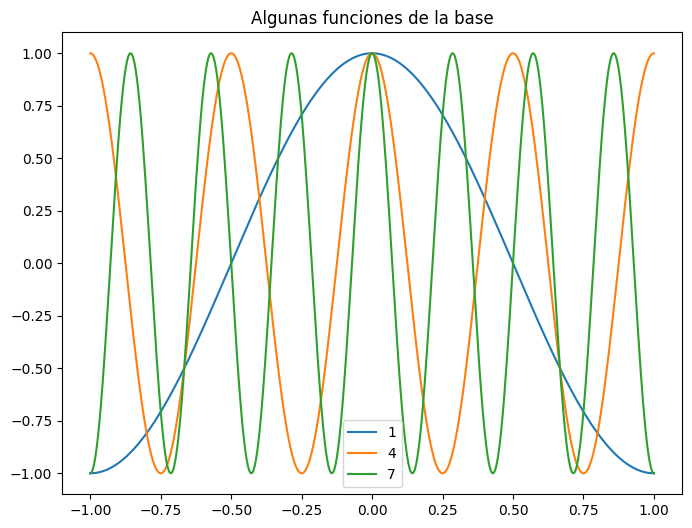

In [28]:
x = np.linspace(-1,1,1_000)

plt.figure(figsize=(8,6))
for k in range(1,10,3):
    plt.plot(x, cos(k)(x), label=f'{k}')
plt.legend()
plt.title('Algunas funciones de la base');

Generemos un ejemplo de la función $f$ cortada con ciertos parámetros que generan la secuencia $W_k$.

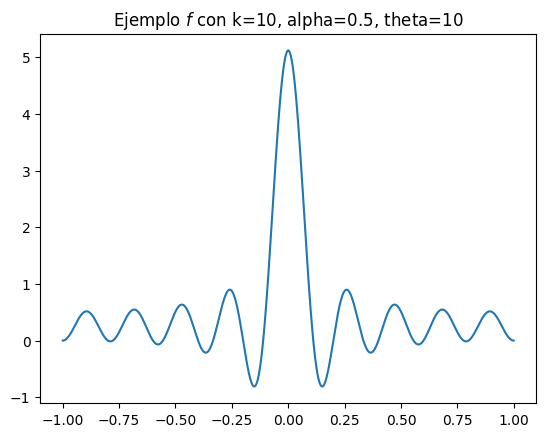

In [36]:
k, alpha, theta = 10, 0.5, 10

f = gen_f(cos, k, alpha, theta)

x = np.linspace(-1,1,1_000)
plt.plot(x, f(x))
plt.title(f'Ejemplo $f$ con {k=}, {alpha=}, {theta=}');

## 3a) 2) Sean estríctamente crecientes en $L^2([0,1])$.

In [37]:
from scipy.special import legendre

In [38]:
sin_k = np.vectorize(lambda t, k: np.sin(np.pi / (k+1) * t))

In [39]:
W_ks = simular_seq_W_k(k, alpha, theta)
f_2 = lambda x, pesos: sum([peso_k * sin_k(x, i) for i in range(k) for peso_k in pesos])

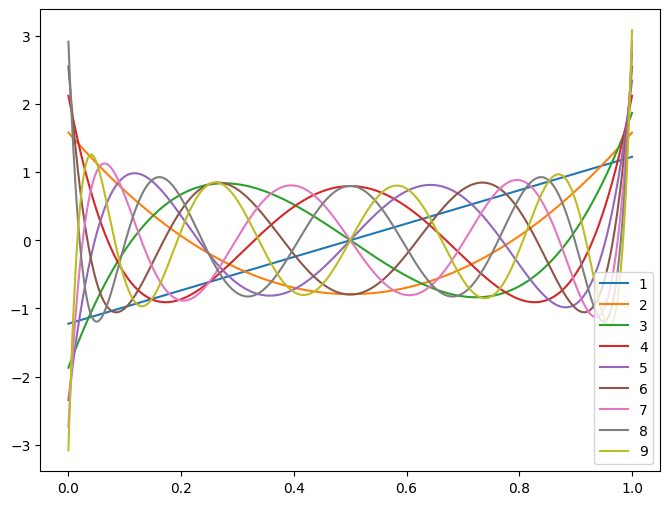

In [40]:
x = np.linspace(0,1,1_000)
plt.figure(figsize=(8,6))

for k in range(1,10):
    plt.plot(x, np.sqrt(k+1/2)*legendre(k)(2*x-1), label=f'{k}')
plt.legend();

In [41]:
f_2 = lambda x, pesos: sum([peso_k * legendre(i)(2*x-1) for i in range(k) for peso_k in pesos])


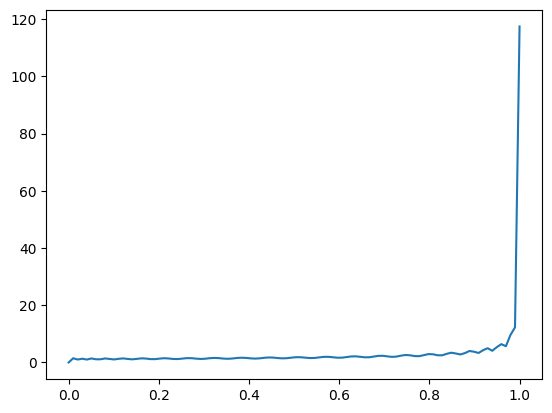

In [42]:
k = 50
alpha = 0.5
theta = 1
x = np.linspace(0,1,100)

W_ks = simular_seq_S_k(k, alpha, theta)

plt.plot(x, f_2(x, W_ks));

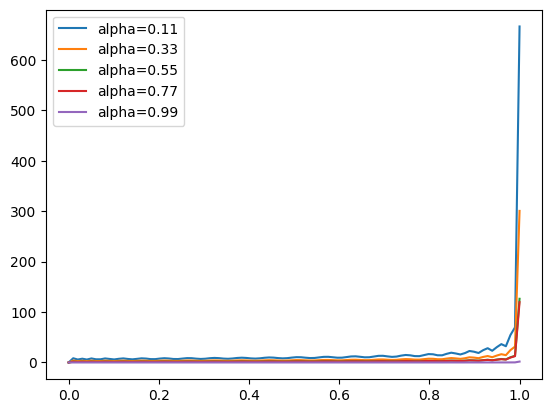

In [43]:
k = 50
alphas = np.linspace(0.11,0.99,5)
theta = 0.01
x = np.linspace(0,1,100)

for alpha in alphas:
    W_ks = simular_seq_S_k(k, alpha, theta)
    plt.plot(x, f_2(x, W_ks), label = f'{alpha=:.2f}')
plt.legend();

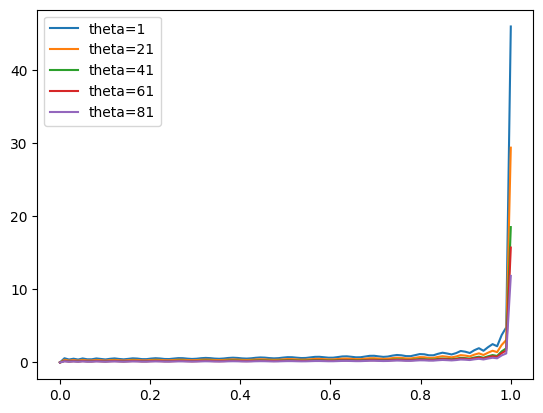

In [44]:
k = 50
alpha = 0.5
thetas = np.arange(1,100,20)
x = np.linspace(0,1,100)

for theta in thetas:
    W_ks = simular_seq_W_k(k, alpha, theta)
    plt.plot(x, f_2(x, W_ks), label = f'{theta=}')
plt.legend();